<a href="https://colab.research.google.com/github/Vicebith/Spatial-data-analysis/blob/main/JARAK%20SPASIAL%20INFRASTRUKTUR%20JALAN%20TERHADAP%20OBJEK%20WISATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

loc = '/content/drive/MyDrive/Data Simulasi/Final Project'

os.chdir(loc)

print('Working Directory: ',os.getcwd())

Mounted at /content/drive
Working Directory:  /content/drive/MyDrive/Data Simulasi/Final Project


# ANALISIS JARAK SPASIAL INFRASTRUKTUR JALAN TERHADAP OBJEK WISATA DI PULAU SUMBA

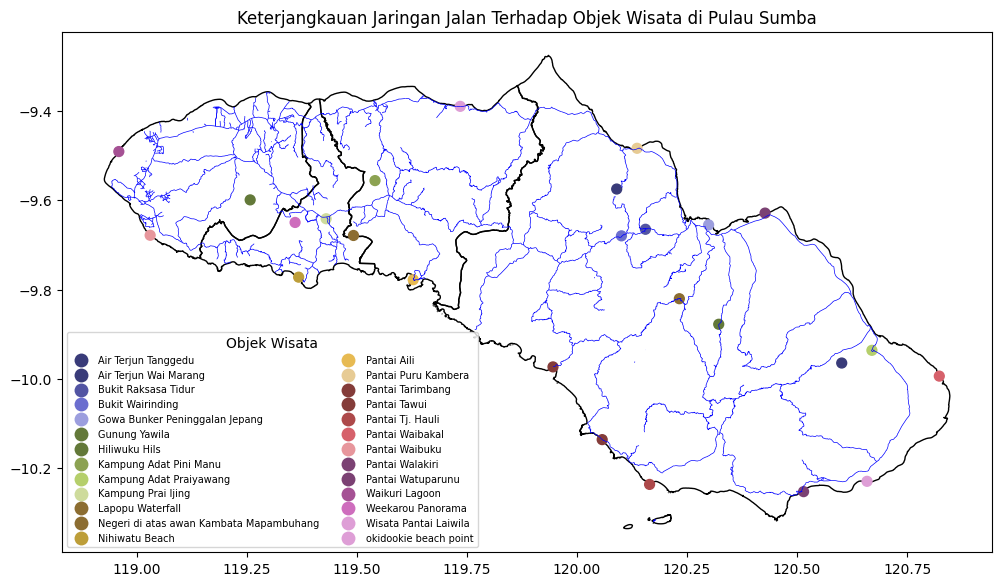

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

batas_administrasi = gpd.read_file('Batas administrasi.shp')
titik_objek_wisata = gpd.read_file('Sumba wisata.shp')
jaringan_jalan = gpd.read_file('Jalan.shp')

fig, ax = plt.subplots(figsize=(12, 8))
batas_administrasi.plot(ax=ax,
                        color='none',
                        edgecolor='black',
                        linewidth=1,
                        )
jaringan_jalan.plot(ax=ax,
                    color='blue',
                    linewidth=0.5,
                    ),

titik_objek_wisata.plot(ax=ax,
                        markersize=50,
                        column='Name',
                        cmap= 'tab20b',
                        legend= True,
                        legend_kwds= {
                          'title': 'Objek Wisata',
                          'loc': "lower left",
                          'ncol': 2,
                          'fontsize' : 7
                          })

plt.title("Keterjangkauan Jaringan Jalan Terhadap Objek Wisata di Pulau Sumba")
plt.show()

In [ ]:
# Identifikasi Jarak Titik Objek Wisata ke Jaringan Jalan Terdekat
from shapely.ops import nearest_points
from geopy.distance import geodesic

# Fungsi untuk menghitung jarak menggunakan geopy
def hitung_jarak_geopy(wisata, jalan):
    nearest_geom = nearest_points(wisata.geometry, jalan.unary_union)[1]
    return geodesic((wisata.geometry.y, wisata.geometry.x), (nearest_geom.y, nearest_geom.x)).kilometers

titik_objek_wisata['jarak ke jalan (km)'] = titik_objek_wisata.apply(
    lambda row: hitung_jarak_geopy(row, jaringan_jalan), axis=1
)

# hasil analisis
print(titik_objek_wisata[['Name', 'jarak ke jalan (km)']])

                                       Name  jarak ke jalan (km)
0                           Pantai Waibakal             8.305525
1                       Air Terjun Tanggedu             1.266592
2                          Bukit Wairinding             0.097005
3                       Bukit Raksasa Tidur             0.005223
4            Gowa Bunker Peninggalan Jepang             0.953428
5                           Pantai Walakiri             0.862673
6                       Pantai Puru Kambera             0.136757
7                     okidookie beach point             0.064182
8                     Air Terjun Wai Marang             2.609604
9                   Kampung Adat Praiyawang             0.099465
10                        Pantai Watuparunu             0.381239
11                    Wisata Pantai Laiwila             2.421184
12                            Hiliwuku Hils             0.027013
13  Negeri di atas awan Kambata Mapambuhang             0.016820
14                       

In [ ]:
!pip install leafmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.2/515.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00


In [ ]:
import leafmap.foliumap as leafmap
#Menghapus kolom
Objek_wisata = titik_objek_wisata.drop(['tessellate','extrude','visibility'], axis=1)

# Konversi ke GeoJSON untuk visualisasi
batas_administrasi_geojson = batas_administrasi.__geo_interface__
Objek_wisata_geojson = Objek_wisata.__geo_interface__
jaringan_jalan_geojson = jaringan_jalan.__geo_interface__

#Peta interaktif
m = leafmap.Map(center=(Objek_wisata.geometry.y.mean(), Objek_wisata.geometry.x.mean()), zoom=10)

# menambahkan layer
m.add_geojson(batas_administrasi_geojson, layer_name="Batas Administrasi", style={"color": "black", "weight": 2})
m.add_geojson(jaringan_jalan_geojson, layer_name="Jaringan Jalan", style={"color": "blue", "weight": 1})
m.add_geojson(Objek_wisata_geojson, layer_name="Titik Objek Wisata", style={"color": "red", "radius": 5})

# Menampilkan peta
m.to_html("peta_interaktif.html")
m